In [1]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, PreTrainedTokenizerFast, DataCollatorForLanguageModeling
import torch
import torch.nn as nn
import sys
import numpy as np
sys.path.append("../VAE_standard")
from models import DNADataset, ALPHABET, SEQ_LENGTH, LATENT_DIM, VAE

from matplotlib import pyplot as plt

sys.path.append("..")
import utils

from Bio import SeqIO
from Bio.Seq import Seq

from devinterp.utils import (
    EvaluateFn,
    EvalResults,
)

from BIF_sampler import (
    BIFEstimator,
    estimate_bif
)

from ex2_hamming_vs_influence import get_ex2_data
import pickle
import pandas as pd

In [2]:
MAX_TOKEN_LENGTH = 510
BATCH_SIZE=60
BIF_BATCH_SIZE=80
num_masks = 3

TEST_SEQ = 1
# TRAIN_CUTOFF = 3000
# TEST_TOKEN = 0

DEVICE = "cuda"

In [3]:
"""
tokenizer: 
input_ids - torch.LongTensor of shape (batch_size, sequence_length)
attention_mask - torch.Tensor of shape (batch_size, sequence_length), Mask values selected in {0,1}, where 0 := masked, 1 := not masked
"""

tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15, return_tensors="pt")

model = AutoModelForMaskedLM.from_pretrained("facebook/esm2_t6_8M_UR50D").to(DEVICE)

In [4]:
data = get_ex2_data(tokenizer)
aa_drop_na = data["aa_drop_na"]
names_drop_na = data["names_drop_na"]
unique_aa_seqs = data["unique_aa_seqs"]
train_data = data["train_data"]
bif_data = data["bif_data"]

num_obs = len(bif_data)
num_data = len(bif_data)
with open("ex2_computed_influences.pkl", "rb") as file:
    computed_bif_matrix, _ = pickle.load(file)

done extracting sequences!
done extracting AAs!


In [10]:
influence_min = 250
row, col = torch.torch.tril_indices(num_data,num_data,offset=-1)
intersection_matrix = torch.where((bif_data[None,:,:] - bif_data[:,None,:]) != 0, 1, 0)[row,col,:]
hamming_dist = torch.sum(((bif_data[None,:,:] - bif_data[:,None,:]) != 0), dim=-1).numpy()
bif_filtered_matrix = computed_bif_matrix >= influence_min

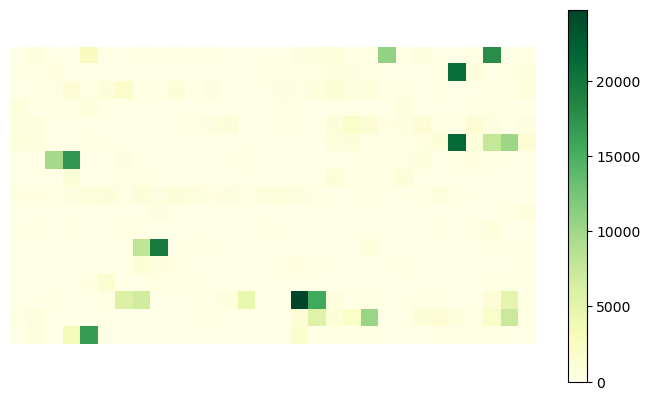

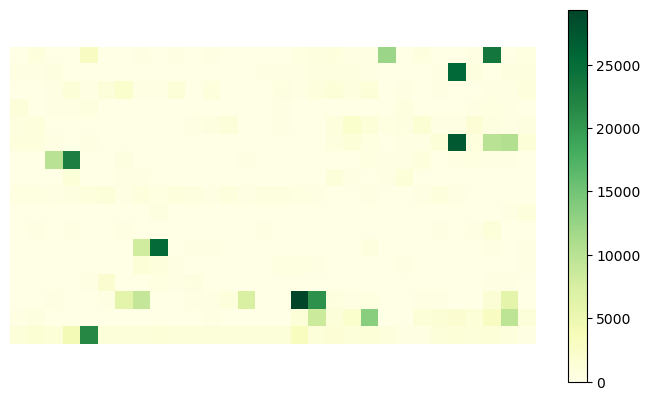

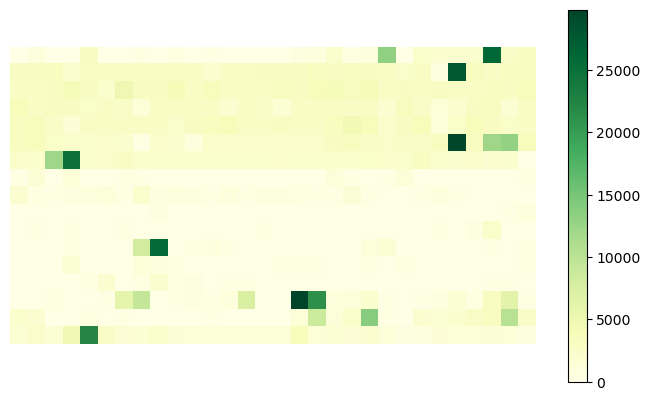

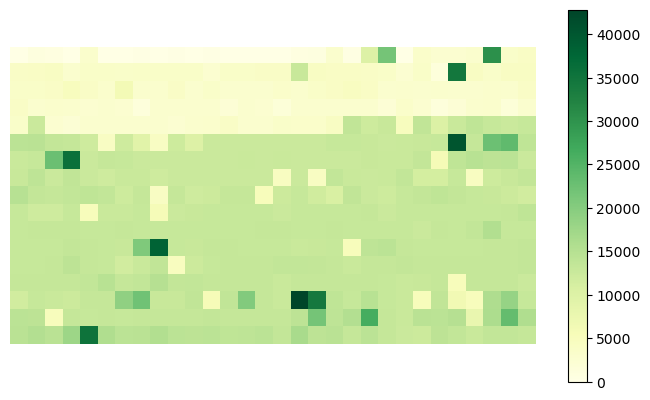

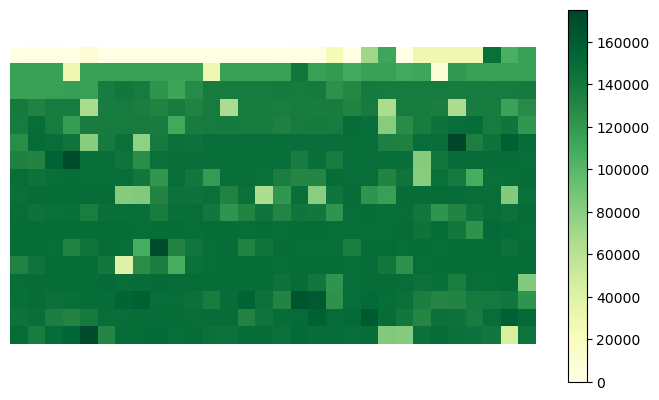

In [12]:
for i in [10, 100, 250, 400, 600]:
    intersection = np.logical_and(hamming_dist <= i, bif_filtered_matrix)
    intersection = intersection[row,col]

    int_mat = torch.sum(intersection_matrix[intersection], dim=0).numpy()
    disp_intersection = int_mat.reshape((17,30))
    plt.matshow(disp_intersection, cmap='YlGn')
    plt.axis("off")
    plt.colorbar()
    plt.show()

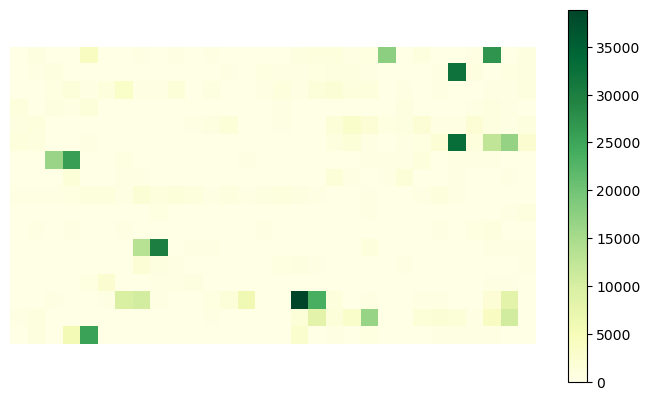

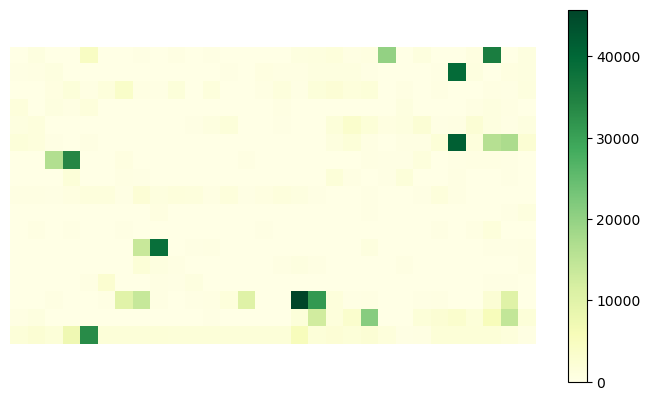

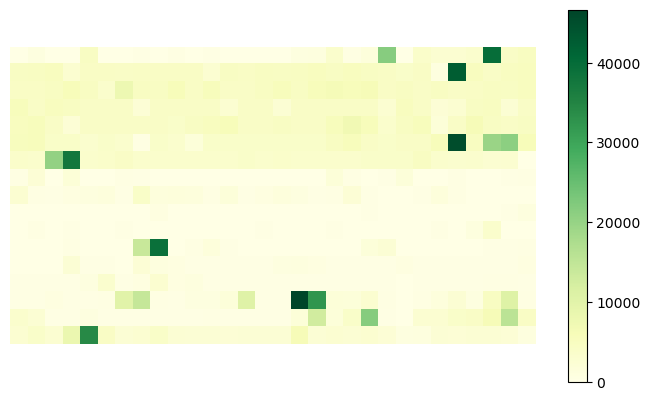

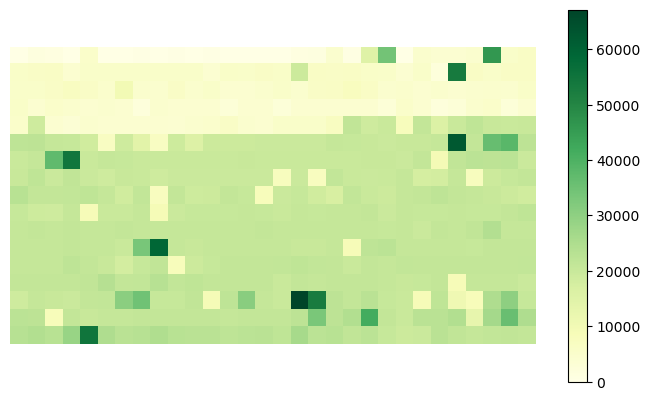

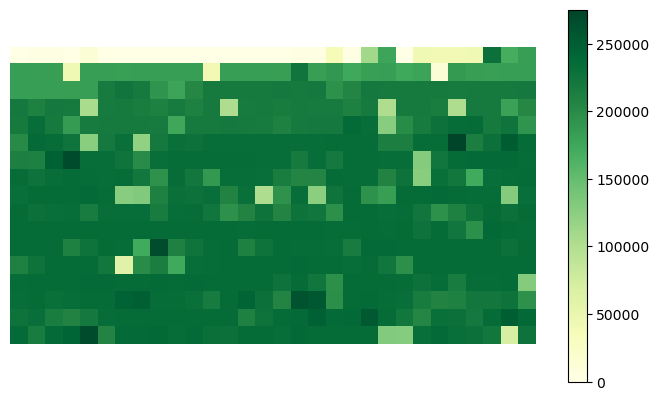

In [13]:
for i in [10, 100, 250, 400, 600]:
    intersection = hamming_dist <= i
    intersection = intersection[row,col]

    int_mat = torch.sum(intersection_matrix[intersection], dim=0).numpy()
    disp_intersection = int_mat.reshape((17,30))
    plt.matshow(disp_intersection, cmap='YlGn')
    plt.axis("off")
    plt.colorbar()
    plt.show()